# Project 3: Web APIs & Classification
--- 

## Problem Statement
Billion-dollar sports league such as NBA and EPL are huge markets for businesses to tap on given the extent of reach and wealth generated. With such a large consumer market, it would be productive to track the current sentiments of our consumers and leverage on their interests to provide business ideas to our clients. Our primary stackholders are sports companies including retailers and providers of sports services(bootcamps/clinics) that are looking for potential marketing investment opporunities by analyzing the current sentiments of sports fans. Our secondary stackholders are digital marketing companies that searching for avenues to better improve communication with their consumers. Therefore, by analyzing 2 of the most popular sports, **basketball** and **soccer**, we could better understand our potential consumers' behaviours and preferrences before we invest in specific business strategies. To achieve maximum profit, we aim to develop a model that correctly predicts the category that a new unseen post belongs to and from this classification, we could further explore the interests of our consumers by analyzing the posts that these words belong to. We quantify the performance of our model using the **accuracy and F1 score** metric across all potential models. Ultimately, the use of **Term Frequency — Inverse Document Frequency(TF-IDF)** technique was more appropriate given the dominance of several words as it places greater emphasis on unique words while the implementation of a **Logistic Regression model** helped us to quantify the influence of words on the differentiating power of our model. This model would be beneficial even to businesses without prior knowledge in the sports industry and to be constantly updated on the current trend.

## Executive Summary

The provision of Application Programming Interfaces(APIs) as an alternative to web scrapping has granted unpredecented access and retrival of large amounts of data in an automated fashion. One such provider is Reddit and through the exploitation of such a powerful tool, we would be able to collect,organize and draw insights that distinguishes posts from 2 particular subreddits on **basketball** and **soccer**. After the removal of redundant tokens/words that provide no discriminatory value such as website links, stopwords and punctuations, there are a few common words that appear frequently. Interestingly, through the analysis of the subreddits, it was discovered that users on basketball subreddits are more interested in understanding and improving on the **technical aspects of the sport** while users on soccer subreddts are more invested in engaging in **post-match discussions and also about their favourite teams**. In addition, the model is highly accurate in predicting the category that each post belongs to given the **high accuracy scores** in both train and test set as well as the F1 scores which determines the accuracy of our predictions. This model emphasises on the use of bigrams to decipher the categories of posts due to the value adding aspects as compared to a unigram. With such a high predictive power, this model serves as a catalyst for building a strong connection between our clients and their desired consumers.

## Contents
- [Data Collection](#Data-Collection)
- [Data Cleaning & Exploratory Data Analysis](#Data-Cleaning-&-Exploratory-Data-Analysis)
- [Data Preparation](#Data-Preparation)
- [Data Modeling](#Data-Modeling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations) 
- [Referrences](#Referrences)

In [1]:
# Importing relevant libraries
import pandas as pd
import regex as re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

import requests
import time

%matplotlib inline

## Data Collection

#### Scrapping content in Basketball posts: <br>
`json()` sends a JSON responds and returns the content of the url in a JSON format which allows us to access the contents similar to a Python dictionary

In [6]:
# reddit.com/r/basketball web page:
url = 'https://www.reddit.com/r/Basketball.json'

# Creating a custom user agent which overwrites Python's predefined user-agent for access to web scrapping, 
# to prevent blocking of access from browers 
headers = {'User-agent': 'she sells seashells by the seashore'}

# Establishing connection to the web page:
res = requests.get(url,headers= headers)

# Use of status codes to understand how the target server responds to your request.
# Ex., 200 = OK, 400 = Bad Request, 403 = Forbidden, 404 = Not Found, 429 = Too Many Requests
print(res.status_code)

# Converting data into a dictionary format which is more familiar thus for ease of manipulation
data_bball = res.json()

200


In [7]:
# The 2 main keys of the data
sorted(data_bball.keys())

['data', 'kind']

In [8]:
# Viewing nested dictionaries
sorted(data_bball['data'].keys())

['after', 'before', 'children', 'dist', 'modhash']

In [9]:
# Making an empty list that would contain title and main body of post 
data_b = []

# Retriving the first 25 posts
params = {}
url = 'https://www.reddit.com/r/Basketball.json'
res = requests.get(url, headers = headers)
if res.status_code == 200:
        the_json_b = res.json()
        # Setting after as the last ID of each request
        after = the_json_b['data']['after']
        params['after'] = after
        for post in the_json_b['data']['children']:
            # Adding title to list
            data_b.append(post['data']['title'])
            # Adding main body of post to list
            data_b.append(post['data']['selftext'])
            after = post['data']['name']
            params['after'] = after
            time.sleep(0.01)

# To hit Reddit's API repeatedly for sufficient number of data(titles and posts)
for i in range(100):
    print(i)
    # To retrieve the next 25 posts, using the param keyword to modify the url since there's a cap of 25 posts/request
    res = requests.get(url,params = params, headers = headers)
    # To check if the url has been correctly encoded
    print(f'URL: {res.url}')
    # Checking to see if the request is successful:
    if res.status_code == 200:
        the_json_b = res.json()
        # Setting after as the last ID of each request
        last_id = the_json_b['data']['after']
        # Printing the last id of each request
        print(f'ID of last post:{last_id}')
        for post in the_json_b['data']['children']:
            # Adding title to list
            data_b.append(post['data']['title'])
            # Adding main body of post to list
            data_b.append(post['data']['selftext'])
            after = post['data']['name']
            params['after'] = after
            time.sleep(0.01)
        print(f'ID of last person: {after}')
        print('-------')
        # The loop stops running if last id is null
        if last_id != after:
            print('END OF THE LINE')
            break
            
    else:
        print(res.status_code)
        break
    time.sleep(0.1)

0
URL: https://www.reddit.com/r/Basketball.json?after=t3_j12ma9
ID of last post:t3_j037zo
ID of last person: t3_j037zo
-------
1
URL: https://www.reddit.com/r/Basketball.json?after=t3_j037zo
ID of last post:t3_iyuwx4
ID of last person: t3_iyuwx4
-------
2
URL: https://www.reddit.com/r/Basketball.json?after=t3_iyuwx4
ID of last post:t3_ix0xl4
ID of last person: t3_ix0xl4
-------
3
URL: https://www.reddit.com/r/Basketball.json?after=t3_ix0xl4
ID of last post:t3_iw1r46
ID of last person: t3_iw1r46
-------
4
URL: https://www.reddit.com/r/Basketball.json?after=t3_iw1r46
ID of last post:t3_itzfdi
ID of last person: t3_itzfdi
-------
5
URL: https://www.reddit.com/r/Basketball.json?after=t3_itzfdi
ID of last post:t3_isg0qy
ID of last person: t3_isg0qy
-------
6
URL: https://www.reddit.com/r/Basketball.json?after=t3_isg0qy
ID of last post:t3_is0nn2
ID of last person: t3_is0nn2
-------
7
URL: https://www.reddit.com/r/Basketball.json?after=t3_is0nn2
ID of last post:t3_ipzlkr
ID of last person: t3

Since each request would only allow us to retrieve 25 posts, one way to garner many posts would be to use a `for` loop which allows for a continuous retrival of posts from the subreddit. The addition of a `sleep()` method is essential to simulate a delay 

In [16]:
# Displaying the first 40 rows of titles/post
data_b[:40]

['RULE REMINDER: You cannot Post Offers to Trade Or Sell Copyright Material. This includes Vertshock and Similar Programs',
 'Admins have banned other subs for this.\n\nNo asking for or posting codes for programs like Vert Shock\n\nNo asking for or posting illegal streams for games.\n\nYou will be banned, as I will not allow the entire sub to be closed for a few bad apples. This is your warning.',
 'r/Basketball Weekly Discussion: Basketball Shoes - September 28, 2020',
 "#Welcome to /r/Basketball's weekly Shoe Discussion thread!\n   \n##Got a question or need some buying advice?  \nThis weekly thread is for discussing the best shoes for YOU based on type of play, environment, price point, etc.\n\n##Excited about that new Adidas or Nike line?  \nThis thread is also for getting hype for the next big sneaker.\n   \n*Moving forward, please post all individual shoe threads as a comment here, both for organization and record-keeping.*",
 'The Best NBA Starting 5s From Every Age Ranked Worst

Based on the top few titles/posts retrived, there are many outliers and redundant features such as **\n, [View Poll]** and **url links** which are non-discriminatory and thus would not provide any value in distinguishing data from the 2 subreddits. These features should be removed before the data is fed into the model. 

In [24]:
# Cleaning each row before saving them as a csv
# Only getting the unique posts, removing control characters
data_bball = [p.replace('\n','').strip() for p in list(set(data_b)) if (p !='') and (p != np.nan)]

# Removing redundant and empty features in the data
cleaned_data_bball = []
for p in data_bball:
    
    i = re.sub('\[View Poll\]\(\S*\)','',p)
    # Only including rows that contain words
    if i != '':
        cleaned_data_bball.append(i)

cleaned_data_bball[:5]
print(f'Number of rows in basketball data: {len(cleaned_data_bball)}')

Number of rows in basketball data: 1795


In [25]:
# Converting the cleaned_data_bball list into a dataframe
cleaned_data_bball_df = pd.DataFrame(cleaned_data_bball)

# Renaming the column name to posts
cleaned_data_bball_df.rename(columns = {0:'posts'},inplace = True)

In [26]:
# Displaying first 5 rows of new dataframe:
cleaned_data_bball_df.head()

,posts
0,A whole different animal.....
1,There’s this league going on this Friday and t...
2,Why are NBA final games played over multiple legs
3,I need help with basic nba knowledge
4,If i’m trying to contest someone’s shot and ju...


In [27]:
# Making a new is_basketball column, where 1 = basketball subreddit, 0 = soccer subreddit
cleaned_data_bball_df['is_basketball'] = 1

In [28]:
# Displaying first 5 rows of new dataframe:
cleaned_data_bball_df.head()

,posts,is_basketball
0,A whole different animal.....,1
1,There’s this league going on this Friday and t...,1
2,Why are NBA final games played over multiple legs,1
3,I need help with basic nba knowledge,1
4,If i’m trying to contest someone’s shot and ju...,1


#### Scrapping content in soccer posts:

In [17]:
# reddit.com/r/soccer web page:
url = 'https://www.reddit.com/r/soccer.json'

# Establishing connection to the web page:
response = requests.get(url)

# Creating a custom user agent for access to web scrapping, to prevent blocking of access from browers that lack this
headers = {'user-agent': 'she sells seashells by the seashore'}

# Use of status codes to understand how the target server responds to your request.
# Ex., 200 = OK, 400 = Bad Request, 403 = Forbidden, 404 = Not Found, 429 = Too Many Requests
print(res.status_code)

# Converting data into a dictionary format which is more familiar thus for ease of manipulation
data_soccer = res.json()

200


In [18]:
# Making an empty list that would contain title and main body of post 
data_soccer = []

# Retriving the first 25 posts
params = {}
url = 'https://www.reddit.com/r/soccer.json'
res = requests.get(url, headers = headers)
if res.status_code == 200:
        the_json_s = res.json()
        # Setting after as the last ID of each request
        after = the_json_s['data']['after']
        params['after'] = after
        for post in the_json_s['data']['children']:
            # Adding title to list
            data_soccer.append(post['data']['title'])
            # Adding main body of post to list
            data_soccer.append(post['data']['selftext'])
            after = post['data']['name']
            params['after'] = after
            time.sleep(0.01)

# To hit Reddit's API repeatedly for sufficient number of data(titles and posts)
for i in range(100):
    print(i)
    # To retrieve the next 25 posts, using the param keyword to modify the url since there's a cap of 25 posts/request
    res = requests.get(url,params = params, headers = headers)
    # To check if the url has been correctly encoded
    print(f'URL: {res.url}')
    # Checking to see if the request is successful:
    if res.status_code == 200:
        the_json_s = res.json()
        # Setting after as the last ID of each request
        last_id = the_json_s['data']['after']
        # Printing the last id of each request
        print(f'ID of last post:{last_id}')
        for post in the_json_s['data']['children']:
            # Adding title to list
            data_soccer.append(post['data']['title'])
            # Adding main body of post to list
            data_soccer.append(post['data']['selftext'])
            after = post['data']['name']
            params['after'] = after
            time.sleep(0.01)
        print(f'ID of last person: {after}')
        print('-------')
        # Stopping the loop once the last post is reached
        if last_id != after:
            print('END OF THE LINE')
            break
            
    else:
        print(res.status_code)
        break
    time.sleep(0.1)

0
URL: https://www.reddit.com/r/soccer.json?after=t3_j2trm5
ID of last post:t3_j2m8ce
ID of last person: t3_j2m8ce
-------
1
URL: https://www.reddit.com/r/soccer.json?after=t3_j2m8ce
ID of last post:t3_j2oxt9
ID of last person: t3_j2oxt9
-------
2
URL: https://www.reddit.com/r/soccer.json?after=t3_j2oxt9
ID of last post:t3_j2v5c7
ID of last person: t3_j2v5c7
-------
3
URL: https://www.reddit.com/r/soccer.json?after=t3_j2v5c7
ID of last post:t3_j2mar1
ID of last person: t3_j2mar1
-------
4
URL: https://www.reddit.com/r/soccer.json?after=t3_j2mar1
ID of last post:t3_j2ue33
ID of last person: t3_j2ue33
-------
5
URL: https://www.reddit.com/r/soccer.json?after=t3_j2ue33
ID of last post:t3_j2uuwe
ID of last person: t3_j2uuwe
-------
6
URL: https://www.reddit.com/r/soccer.json?after=t3_j2uuwe
ID of last post:t3_j2mktu
ID of last person: t3_j2mktu
-------
7
URL: https://www.reddit.com/r/soccer.json?after=t3_j2mktu
ID of last post:t3_j2kmly
ID of last person: t3_j2kmly
-------
8
URL: https://w

In [19]:
# Displaying the top few titles/posts retrived 
data_soccer[:10]

['Daily Discussion',
 'This thread is for general football discussion and a place to ask quick questions.\n\nNew to the subreddit? Get your [team crest](https://www.reddit.com/r/soccer/wiki/flair) and have a read of [our rules](/r/soccer/wiki/rules#wiki_community_rules).\n\n**Quick links**:\n\n[](#icon-ball) [Match threads](/r/soccer/search?q=flair%3Amatch%2Bthread+AND+NOT+flair%3Apost+AND+NOT+flair%3Apre&amp;restrict_sr=on&amp;sort=new&amp;t=day#res-hide-options)\n\n[](#icon-whistle) [Post match threads](/r/soccer/search?q=flair%3Apost%2Bmatch&amp;restrict_sr=on&amp;sort=new&amp;t=week#res-hide-options)\n\n[](#icon-news) [League roundups](/r/soccer/search?q=flair%3Aroundup&amp;sort=new&amp;restrict_sr=on&amp;t=week&amp;feature=legacy_search#res-hide-options)\n\n[](#icon-tv) [Watch highlights](/r/soccer/search?q=flair%3Amedia+OR+flair%3AMirror&amp;restrict_sr=on&amp;sort=hot&amp;t=day#res-hide-options)\n\n[](#icon-notes) [Read the news](/r/soccer/search?q=NOT+flair%3Amedia+AND+NOT+flai

Based on the top few rows of data retrived, there are many anomalies such as **empty posts, anchor tags** and **url links** that were included in `data_soccer` thus should be removed due to their non-discriminatory behaviours.

In [35]:
# Cleaning each row before saving them as a csv
# Only getting the unique posts and removing control characters
data_soccer = [p.replace('\n','').strip() for p in list(set(data_soccer)) if (p !='') and (p != np.nan)]

# Removing redundant, non-discriminatory words in the data
cleaned_data_soccer = []
for p in data_soccer:
    # Removing tags from polls
    i = re.sub('\[View Poll\]\(\S*\)','',p) 
    # removing non-discriminatory anchor tags present in subreddits
    i = re.sub('\(#icon-.*\)','',i) 
    i = re.sub('\(#sprite.*\)','',i)
    i = re.sub('\(#bar.*\)','',i)
    # removing video links and urls
    i = re.sub('[(\\s]http.*[\\s\)]','',i) # Removing urls within posts
    if i != '':
        cleaned_data_soccer.append(i)



In [30]:
# Converting the cleaned_data_soccer list into a dataframe
cleaned_data_soccer_df = pd.DataFrame(cleaned_data_soccer)

# Renaming the column name to posts
cleaned_data_soccer_df.rename(columns = {0:'posts'},inplace = True)

In [31]:
cleaned_data_soccer[:5]

['Neymar could be out of Ligue 1 action until 2021',
 '[ASSOCIATED PRESS] Genoa has 12 more virus cases, taking total to 14. Possibly infecting Napoli Players.',
 "[MSL] JDT FC [6] - 0 Selangor FA - Ramadhan Saifullah amazing finish (75')",
 'Messi: "Some say I should\'ve kept quiet, let it pass as I have with so many other things. But I was hurt and it was my way of expressing it. All who know me know that I am not capable of playing anything other than to win and to give everything on the pitch. My commitment to this shirt is total.”',
 "# FT: [] Bolívar ||---------------------------:|:-----:|:-------------------------||                  Willian 3'| [1]-0 |                          ||                  Wesley 47'| [2]-0 |                          ||                 M. Viña 59'| [3]-0 |                          ||           Raphael Veiga 61'| [4]-0 |                          ||                    Rony 64'| [5]-0 |                          |---[] |"]

In [32]:
# Displaying the first 5 rows of cleaned_data_soccer_df
cleaned_data_soccer_df.head()

,posts
0,Neymar could be out of Ligue 1 action until 2021
1,[ASSOCIATED PRESS] Genoa has 12 more virus cas...
2,[MSL] JDT FC [6] - 0 Selangor FA - Ramadhan Sa...
3,"Messi: ""Some say I should've kept quiet, let i..."
4,# FT: [] Bolívar ||---------------------------...


In [33]:
# Making a new is_basketball column, where 1 = basketball subreddit, 0 = soccer subreddit
cleaned_data_soccer_df['is_basketball'] = 0

In [34]:
# Displaying the first 5 rows of cleaned_data_soccer_df
cleaned_data_soccer_df.head()

,posts,is_basketball
0,Neymar could be out of Ligue 1 action until 2021,0
1,[ASSOCIATED PRESS] Genoa has 12 more virus cas...,0
2,[MSL] JDT FC [6] - 0 Selangor FA - Ramadhan Sa...,0
3,"Messi: ""Some say I should've kept quiet, let i...",0
4,# FT: [] Bolívar ||---------------------------...,0


### Saving the data as `csv` files 
The size of data retrived from each subreddit could have a effect on the performance of the model and therefore could be explored. The `combined_total_data.csv` would contain all the rows that were retrived from webscrapping.

In [66]:
# Saving the individual subreddits in different csv files
cleaned_data_bball_df.to_csv('../datasets/basketball.csv',index = False)
cleaned_data_soccer_df.to_csv('../datasets/soccer.csv',index = False)

In [67]:
# Merging the 2 dataframes into combined_df
combined_df = cleaned_data_bball_df.append(cleaned_data_soccer_df)

In [68]:
# Displaying the first 5 rows of combined_df
combined_df.head()

,posts,is_basketball
0,LeBron James and kawhi leonard to both score o...,1
1,"hello guys, i want to improve my game but i do...",1
2,I’m 20 years old and started playing Basketbal...,1
3,Is it possible that Spalding Lost its weight?,1
4,I need some help with my footwork,1


In [70]:
# Saving the final_df as a combined_total_data.csv
combined_df.to_csv('../datasets/combined_df.csv',index = False)

## Data Cleaning & Exploratory Data Analysis

#### Exploring individual subreddits

In [40]:
# Loading basketball data from `basketball.csv` into `df_bball` dataframe
df_bball = pd.read_csv('../datasets/basketball.csv')

# Loading soccer data from `soccer.csv` into `df_s` dataframe
df_s = pd.read_csv('../datasets/soccer.csv')

# Loading combined data from `combined_df` into `df` dataframe
df = pd.read_csv('../datasets/combined_df.csv')

### Pre-processing and cleaning of data
Before the manipulation of the combined data, it would be useful to study and analyze tokens in each subreddit to understand the influence of specific tokens on model performance.

#### Removal of unnecessary features:
Several pre-processing steps have to be done to the raw data to remove redundant and non-discriminatory features before any modelling can be done. This because addition of such features would hinder the performance of the model since thy do not provide any value when deciding on the category that the post belongs to. These 3 changes can be done using the `posts_to_words` function. <br>

These pre-processing steps include: <br>
- Removal of punctuations
- Removal of stop words
- Converting words to lowercases
- Lemmatizing/Stemming

#### Importance of  lemmatizing words:
Lemmatization allows for the reduction of each word to a common or its lemma form by removing inflectional endings. This normalization of texts helps to cluster words together and thus reduces the number of inputs fed into our model, improving its efficiency and speed. Unlike stemming, lemmatization returns actual language words and thus would be chosen as the normalization technique.

In [42]:
# Function to convert a raw post to a string of words
def posts_to_words_lem(post):
    
    # Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", post)
    
    # Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # Remove stop words
    stops = stopwords.words('english')
    
    # Lemmatizing words.
    lemmatizer = WordNetLemmatizer()
    meaningful_words = [lemmatizer.lemmatize(w) for w in words if not w in stops]
    
    # Join the words back into a single string separated by space, 
    return(" ".join(meaningful_words))

#### Visualizing tokens in `df_bball`

In [412]:
# Saving lemmatized posts as a new column
df_bball['cleaned_lemmatized_posts'] = [posts_to_words_lem(p) for p in df_bball['posts']]
# Displaying the first 5 lemmatized posts
df_bball['cleaned_lemmatized_posts'][:5]

0    lebron james kawhi leonard score point good be...
1    hello guy want improve game get stuff cant spi...
2    year old started playing basketball year ago d...
3                        possible spalding lost weight
4                                   need help footwork
Name: cleaned_lemmatized_posts, dtype: object

### Feature Extraction - Encoding text data 
After texts are reduced to their stems, they have to be encoded as numerical values to be used as inputs in our models and this process is called **Feature Extraction**. This helps to convert texts into familiar features which are vectors of numbers that our model could work with. One such method would be to use Bag-Of-Words which assigns each word to a number however more efficient transformations such as `CountVectorizer()` and `TfidfVectorizer()` would be explored

#### CountVectorizer() 
`CountVectorizer()` is a configurable class which converts a document into a vector of token counts. Since it has multiple hyperparameters that could be tuned, it is more advantageous than using Bag-Of-Words. 

**Visualizing unigrams and bigrams in `df_bball`**

In [413]:
# Instantiating CountVectorizer
cvec = CountVectorizer(ngram_range = (1,1))

# Fit and transform the lemmatized posts
bball_lemmatized = cvec.fit_transform(df_bball['cleaned_lemmatized_posts'])

# Converting the lemmatized posts into a dataframe
bball_lemmatized_df = pd.DataFrame(bball_lemmatized.todense(), columns = cvec.get_feature_names())

# Sorting and assigning tokens to their respective frequencies
freq_of_bball_words = sorted(zip(cvec.get_feature_names(),bball_lemmatized.toarray().sum(axis=0)), key = lambda x: x[1], reverse=True)

In [414]:
# Instantiating CountVectorizer
cvec2 = CountVectorizer(ngram_range = (2,2))

# Fit and transform the lemmatized posts
bball_lemmatized_2 = cvec2.fit_transform(df_bball['cleaned_lemmatized_posts'])

# Converting the lemmatized posts into a dataframe
bball_lemmatized_2_df = pd.DataFrame(bball_lemmatized_2.todense(), columns = cvec2.get_feature_names())

# Sorting and assigning tokens to their respective frequencies
freq_of_bball_words_2 = sorted(zip(cvec2.get_feature_names(),bball_lemmatized_2.toarray().sum(axis=0)), key = lambda x: x[1], reverse=True)

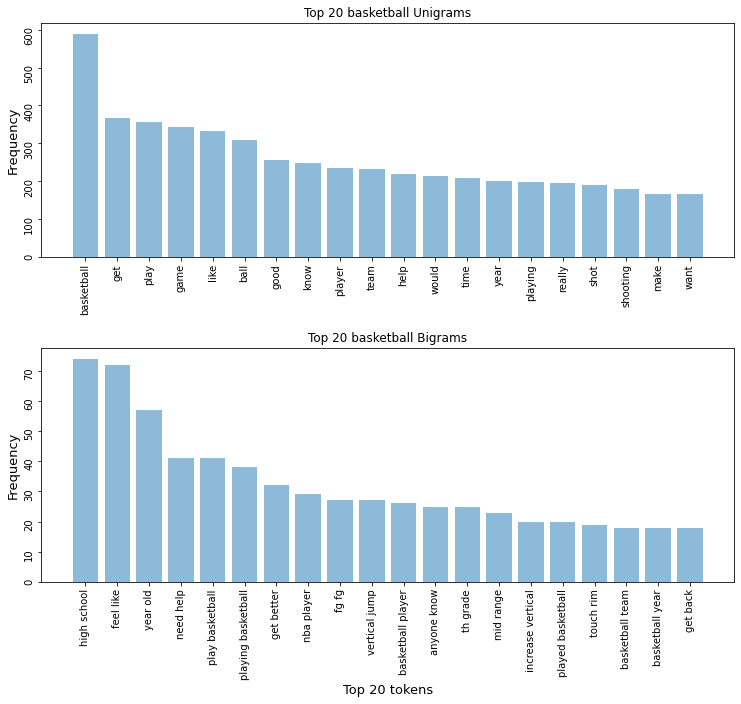

In [415]:
# Displaying the top 20 occurring tokens in basketball subreddit
fig, (ax1, ax2) = plt.subplots(2,figsize = (12,10))
fig.tight_layout(pad=7.0)
ax1.bar([p[0] for p in freq_of_bball_words[:20]],[p[1] for p in freq_of_bball_words[:20]],align='center', alpha=0.5)
ax1.tick_params(labelrotation=90)
ax1.set_ylabel('Frequency',fontsize = 13)
ax1.set_title('Top 20 basketball Unigrams')
ax2.bar([p[0] for p in freq_of_bball_words_2[:20]],[p[1] for p in freq_of_bball_words_2[:20]],align='center', alpha=0.5)
ax2.tick_params(labelrotation=90)
ax2.set_ylabel('Frequency',fontsize = 13)
ax2.set_xlabel('Top 20 tokens',fontsize = 13)
ax2.set_title('Top 20 basketball Bigrams');

Based on the bar graph above, the **basketball** token seemed to be prevalent in many of the rows and therefore the use of `TfidfVectorizer()` on the combined data would be more appropriate as it penalizes frequently occurring words and places more importance on words that are less common. This would also help to tackle the imbalanced classes given that there are twice as many basketball posts than soccer posts. Moreover, by viewing bi-grams, appearance of generic words such as **get**,**play**,**like** become more rational and reliable in providing distinguishing power. They give greater insights into the interests of users such as the prevalence of **high school** and **need help** which could be a hint at a possible entry into a potential group of consumers hidden by looking at only unigrams.

#### TfidVectorizer()
Visualizing unigrams and bigrams in `df_bball`

In [416]:
# Instantiating TfidVectorizer
tvec = TfidfVectorizer(ngram_range = (1,1))

# Fit and transform the lemmatized posts
bball_lemmatized = tvec.fit_transform(df_bball['cleaned_lemmatized_posts'])

# Converting the lemmatized posts into a dataframe
bball_lemmatized_df = pd.DataFrame(bball_lemmatized.todense(), columns = tvec.get_feature_names())

# Sorting and assigning tokens to their respective frequencies
freq_of_bball_words = sorted(zip(tvec.get_feature_names(),bball_lemmatized.toarray().sum(axis=0)), key = lambda x: x[1], reverse=True)

In [417]:
# Instantiating TfidVectorizer
tvec2 = TfidfVectorizer(ngram_range = (2,2))

# Fit and transform the lemmatized posts
bball_lemmatized_2 = tvec2.fit_transform(df_bball['cleaned_lemmatized_posts'])

# Converting the lemmatized posts into a dataframe
bball_lemmatized_2_df = pd.DataFrame(bball_lemmatized_2.todense(), columns = tvec2.get_feature_names())

# Sorting and assigning tokens to their respective frequencies
freq_of_bball_words_2 = sorted(zip(tvec2.get_feature_names(),bball_lemmatized_2.toarray().sum(axis=0)), key = lambda x: x[1], reverse=True)

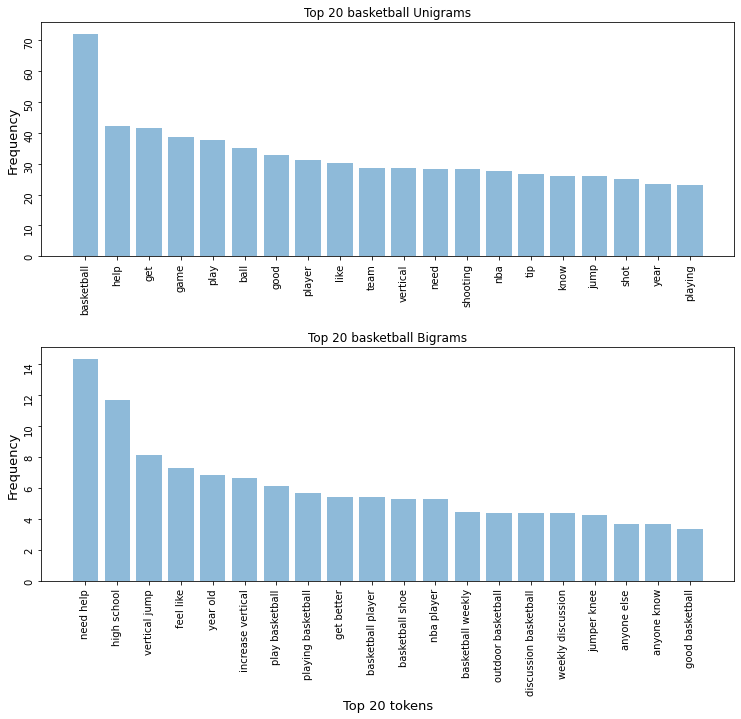

In [418]:
# Displaying the top 20 occurring tokens in basketball subreddit
fig, (ax1, ax2) = plt.subplots(2,figsize = (12,10))
fig.tight_layout(pad=7.0)
ax1.bar([p[0] for p in freq_of_bball_words[:20]],[p[1] for p in freq_of_bball_words[:20]],align='center', alpha=0.5)
ax1.tick_params(labelrotation=90)
ax1.set_ylabel('Frequency',fontsize = 13)
ax1.set_title('Top 20 basketball Unigrams')
ax2.bar([p[0] for p in freq_of_bball_words_2[:20]],[p[1] for p in freq_of_bball_words_2[:20]],align='center', alpha=0.5)
ax2.tick_params(labelrotation=90)
ax2.set_ylabel('Frequency',fontsize = 13)
ax2.set_xlabel('Top 20 tokens',fontsize = 13)
ax2.set_title('Top 20 basketball Bigrams');

#### Visualizing tokens in `df_s`

In [278]:
# Saving lemmatized posts as a new column
df_s['cleaned_lemmatized_posts'] = [posts_to_words_lem(p) for p in df_s['posts']]

# Displaying the first 5 lemmatized posts
df_s['cleaned_lemmatized_posts'][:5]

0          match thread west bromwich albion v chelsea
1    funke jadon sancho sold season anymore stateme...
2    canal aulas interview say arsenal offer low as...
3    fabrizio romano rub n dia manchester city go c...
4    dzfoot english riyad mahrez make th career app...
Name: cleaned_lemmatized_posts, dtype: object

**Visualizing unigrams and bigrams in `df_s`**

In [279]:
# Instantiating CountVectorizer
cvec = CountVectorizer(ngram_range = (1,1))

# Fit and transform the lemmatized posts
s_lemmatized = cvec.fit_transform(df_s['cleaned_lemmatized_posts'])

# Converting the lemmatized posts into a dataframe
s_lemmatized_df = pd.DataFrame(s_lemmatized.todense(), columns = cvec.get_feature_names())

# Sorting and assigning tokens to their respective frequencies
freq_of_s_words = sorted(zip(cvec.get_feature_names(),s_lemmatized.toarray().sum(axis=0)), key = lambda x: x[1], reverse=True)

In [280]:
# Instantiating CountVectorizer
cvec2 = CountVectorizer(ngram_range = (2,2))

# Fit and transform the lemmatized posts
s_lemmatized_2 = cvec2.fit_transform(df_s['cleaned_lemmatized_posts'])

# Converting the lemmatized posts into a dataframe
s_lemmatized_2_df = pd.DataFrame(s_lemmatized_2.todense(), columns = cvec2.get_feature_names())

# Sorting and assigning tokens to their respective frequencies
freq_of_s_words_2 = sorted(zip(cvec2.get_feature_names(),s_lemmatized_2.toarray().sum(axis=0)), key = lambda x: x[1], reverse=True)

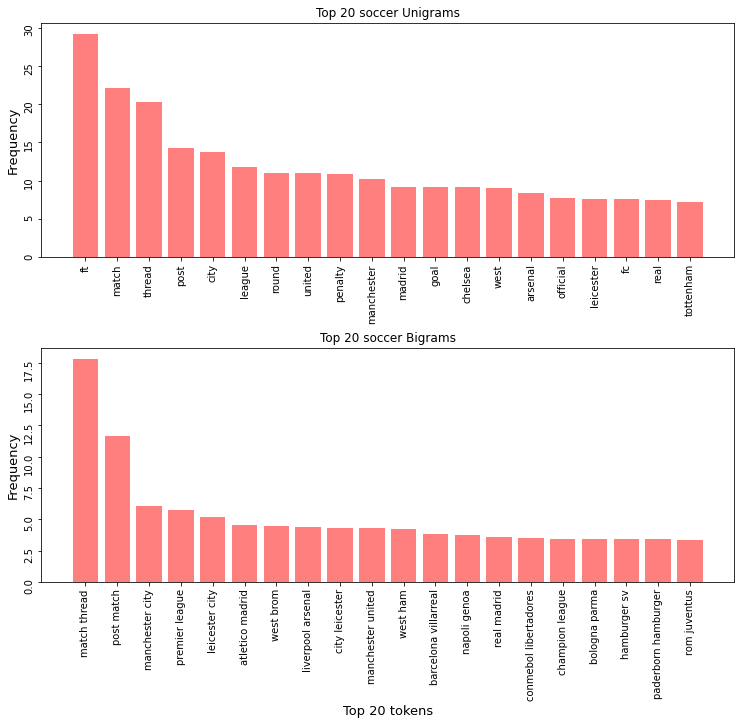

In [296]:
# Displaying the top 20 occurring tokens in basketball subreddit
fig, (ax1, ax2) = plt.subplots(2,figsize = (12,10))
fig.tight_layout(pad=7.0)
ax1.bar([p[0] for p in freq_of_s_words[:20]],[p[1] for p in freq_of_s_words[:20]],align='center', alpha=0.5,color = 'r')
ax1.tick_params(labelrotation=90)
ax1.set_ylabel('Frequency',fontsize = 13)
ax1.set_title('Top 20 soccer Unigrams')
ax2.bar([p[0] for p in freq_of_s_words_2[:20]],[p[1] for p in freq_of_s_words_2[:20]],align='center', alpha=0.5,color = 'r')
ax2.tick_params(labelrotation=90)
ax2.set_ylabel('Frequency',fontsize = 13)
ax2.set_xlabel('Top 20 tokens',fontsize = 13)
ax2.set_title('Top 20 soccer Bigrams');

In [283]:
# Instantiating TfidVectorizer
tvec = TfidfVectorizer(ngram_range = (1,1))

# Fit and transform the lemmatized posts
s_lemmatized = tvec.fit_transform(df_s['cleaned_lemmatized_posts'])

# Converting the lemmatized posts into a dataframe
s_lemmatized_df = pd.DataFrame(s_lemmatized.todense(), columns = tvec.get_feature_names())

# Sorting and assigning tokens to their respective frequencies
freq_of_s_words = sorted(zip(tvec.get_feature_names(),s_lemmatized.toarray().sum(axis=0)), key = lambda x: x[1], reverse=True)

In [284]:
# Instantiating TfidVectorizer
tvec2 = TfidfVectorizer(ngram_range = (2,2))

# Fit and transform the lemmatized posts
s_lemmatized_2 = tvec2.fit_transform(df_s['cleaned_lemmatized_posts'])

# Converting the lemmatized posts into a dataframe
s_lemmatized_2_df = pd.DataFrame(s_lemmatized_2.todense(), columns = tvec2.get_feature_names())

# Sorting and assigning tokens to their respective frequencies
freq_of_s_words_2 = sorted(zip(tvec2.get_feature_names(),s_lemmatized_2.toarray().sum(axis=0)), key = lambda x: x[1], reverse=True)

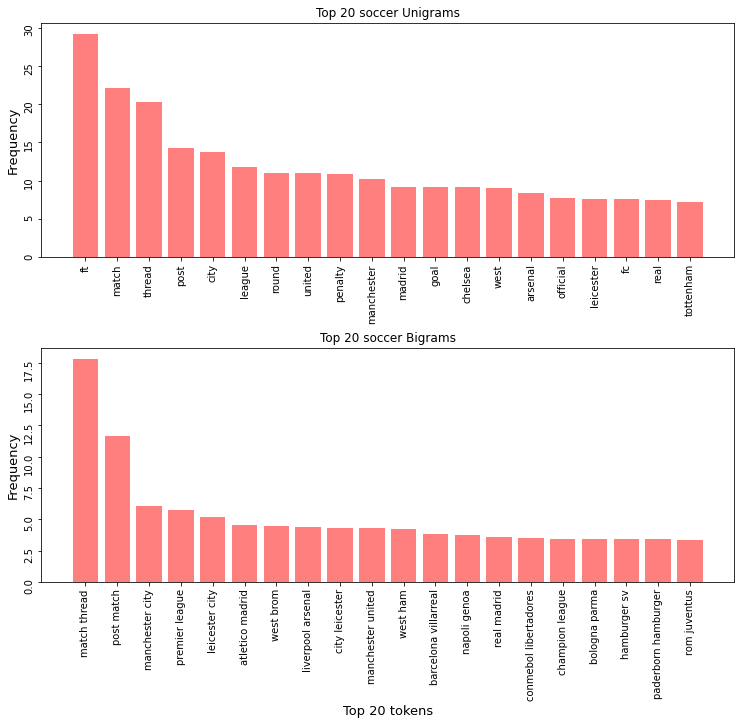

In [286]:
# Displaying the top 20 occurring tokens in basketball subreddit
fig, (ax1, ax2) = plt.subplots(2,figsize = (12,10))
fig.tight_layout(pad=7.0)
ax1.bar([p[0] for p in freq_of_s_words[:20]],[p[1] for p in freq_of_s_words[:20]],align='center', alpha=0.5,color = 'r')
ax1.tick_params(labelrotation=90)
ax1.set_ylabel('Frequency',fontsize = 13)
ax1.set_title('Top 20 soccer Unigrams')
ax2.bar([p[0] for p in freq_of_s_words_2[:20]],[p[1] for p in freq_of_s_words_2[:20]],align='center', alpha=0.5,color = 'r')
ax2.tick_params(labelrotation=90)
ax2.set_ylabel('Frequency',fontsize = 13)
ax2.set_xlabel('Top 20 tokens',fontsize = 13)
ax2.set_title('Top 20 soccer Bigrams');

Similarly, the dominance of the token **match** encourages the use of `TfidVectorizer` and certain non-discriminatory unigrams such as **match** and **post** become significant as in bi-grams. Although the soccer data had distinguishable tokens such as **manchester** and **madrid**, additional meaningful insights could be drawn from these bi-grams such as a prevalence of post-match discussions which would have been hidden if these words were seen as unigrams. 

### Cleaning the combined dataframe

Based on the findings above, it would be purposeful to quantify words in the form of **bigrams** instead of unigrams given the additional findings that were derived above. In addition, the dominance of several words would encourage the use of **TF-IDF** as a vectorization technique so as to detect for distinct and unique terms which were diluted by other dominant words.

In [38]:
# Loading the combined data into df
df = pd.read_csv('../datasets/combined_df.csv')

In [39]:
# Displaying the first 5 rows of df
df.head()

,posts,is_basketball
0,LeBron James and kawhi leonard to both score o...,1
1,"hello guys, i want to improve my game but i do...",1
2,I’m 20 years old and started playing Basketbal...,1
3,Is it possible that Spalding Lost its weight?,1
4,I need some help with my footwork,1


### Lemmatizing Posts

In [43]:
# Saving lemmatized posts as a new column
df['cleaned_lemmatized_posts'] = [posts_to_words_lem(p) for p in df['posts']]

In [44]:
# Displaying the first 5 lemmatized posts
df['cleaned_lemmatized_posts'][:5]

0    lebron james kawhi leonard score point good be...
1    hello guy want improve game get stuff cant spi...
2    year old started playing basketball year ago d...
3                        possible spalding lost weight
4                                   need help footwork
Name: cleaned_lemmatized_posts, dtype: object

### Baseline accuracy

Calculating the baseline accuracy in order to tell if our model is outperforming the null model (predicting the majority class).

In [45]:
# Calculating the baseline accuracy using the percentage of each class
percent = df['is_basketball'].value_counts(normalize = True)[1]
print(f'The probability of predicting the Basketball class: {round(percent*100,2)}%')

The probability of predicting the Basketball class: 68.07%


## Data Preparation

Setting up the data for modeling:
- `X` will be the `cleaned_lemmatized_posts` column. 
- `y` will be the `is_basketball` column

In [49]:
X_lemmatized = df['cleaned_lemmatized_posts']
y = df['is_basketball']

### Train/Test Split
Since `df` contains imbalanced rows since there are more basketball data than soccer data, in order to ensure equal proportions of both classes across train test splits, the `y` feature should be stratified using the `stratify` parameter. This prevents the overrepresentation of basketball data in a particular dataset and therefore ensuring a fair split.

In [50]:
# Splitting df into train and test data for model validation and testing
X_train,X_test,y_train,y_test = train_test_split(X_lemmatized,y,stratify = y,random_state = 42)

## Data Modeling

The use of `LogisticRegression` would be appropriate since `y` output variable is discrete and by converting words into bigrams, it would help to reduce the independence between features, as compared to unigrams. In addition, logistic regression assigns coefficients to each token hence allows for the quantification of the strength of these tokens on the predictions generated.

### `CountVectorizer()` and `LogisticRegression()`

In [569]:
# Pipeline contains a list of steps, steps contain list of tuples
pipe = Pipeline([
    
            ('cvec',CountVectorizer()),
            ('lr',LogisticRegression())
])

In [570]:
# Setting different parameters for our GridSearchCV - lemmatized

pipe_params = {
    # Setting a limit of n-number of features included/vocab size
    'cvec__max_features': [1000,1500,2000,2500,3000],

    # Setting a minimum number of times the word/token has to appear in n-documents
    'cvec__min_df':[2,3],
    
    # Setting an upper threshold/max percentage of n% of documents from corpus 
    'cvec__max_df':[0.1,0.2,0.3,0.4,0.5],
    
    # Testing with bigrams
    'cvec__ngram_range':[(2,2)]
}
# Loading the `pipeline` object into our `GridSearchCV()`
gs = GridSearchCV(pipe,param_grid = pipe_params, cv = 3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'cvec__max_features': [1000, 1500, 2000, 2500, 3000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(2, 2)]})

The **accuracy** metric would be used to compare the performance of differernt models which calculates the ratio of correct predictions to total number of predictions. Since classes(true positives,true negatives,false positives, false negatives) are all equally important and misclassification is less costly, **accuracy** is a suitable metric to quantify the performance of the models.

In [549]:
print(f'Mean accuracy of model: {round(gs.best_score_,5)}')
print(f'Best Parameters of model: {gs.best_params_}')

Mean accuracy of model: 0.81047
Best Parameters of model: {'cvec__max_df': 0.1, 'cvec__max_features': 1500, 'cvec__min_df': 2, 'cvec__ngram_range': (2, 2)}


In [550]:
# Scoring entire X_train dataset using the optimized model
print(f'Accuracy Score for train set: {round(gs.score(X_train,y_train),5)}')
# Scoring X_test using the optimized model
print(f'Accuracy Score for test set: {round(gs.score(X_test,y_test),5)}')

Accuracy Score for train set: 0.88407
Accuracy Score for test set: 0.83082


Since the accuracy score for train set is higher than that of the test set, overfitting could have occurred and thus the model has high variance and unable to generalize, resulting in predictions that are less accurate. The use of an additional metric could help validate the performance of another model. One such metric would be the **F1 score** which weighs the model's precision and robustness. As compared to the accuracy metric, the **F1 score** gives a better measure of the incorrectly classified cases and it is better suited for imbalanced classes which exist in our dataset.

In [551]:
# Using the best parameters to vectorize features before fitting it into model
cv = CountVectorizer(max_df= gs.best_params_['cvec__max_df'],
                     max_features= gs.best_params_['cvec__max_features'],
                     min_df=gs.best_params_['cvec__min_df'],
                     ngram_range=gs.best_params_['cvec__ngram_range'])
cv.fit(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [552]:
cv = CountVectorizer(max_df= gs.best_params_['cvec__max_df'],
                     max_features= gs.best_params_['cvec__max_features'],
                     min_df=gs.best_params_['cvec__min_df'],
                     ngram_range=gs.best_params_['cvec__ngram_range'])
cv.fit(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [553]:
# Instantiating model
lr = LogisticRegression()
# Fitting Model
lr.fit(X_train_cv,y_train)
# Calculating the F1 score to measure test's accuracy
preds = lr.predict(X_test_cv)
print(f'F1 score for Logistic Regression model: {round(f1_score(y_test,preds),5)}')

F1 score for Logistic Regression model: 0.88955


In [554]:
# Sorting and visualizing the top occurring words
freq_of_all_words = sorted(zip(cv.get_feature_names(),X_train_cv.toarray().sum(axis=0)), key = lambda x: x[1], reverse=True)
freq_of_all_words[:10]

[('match thread', 62),
 ('high school', 52),
 ('year old', 52),
 ('feel like', 49),
 ('post match', 37),
 ('need help', 32),
 ('play basketball', 28),
 ('playing basketball', 27),
 ('nba player', 24),
 ('vertical jump', 22)]

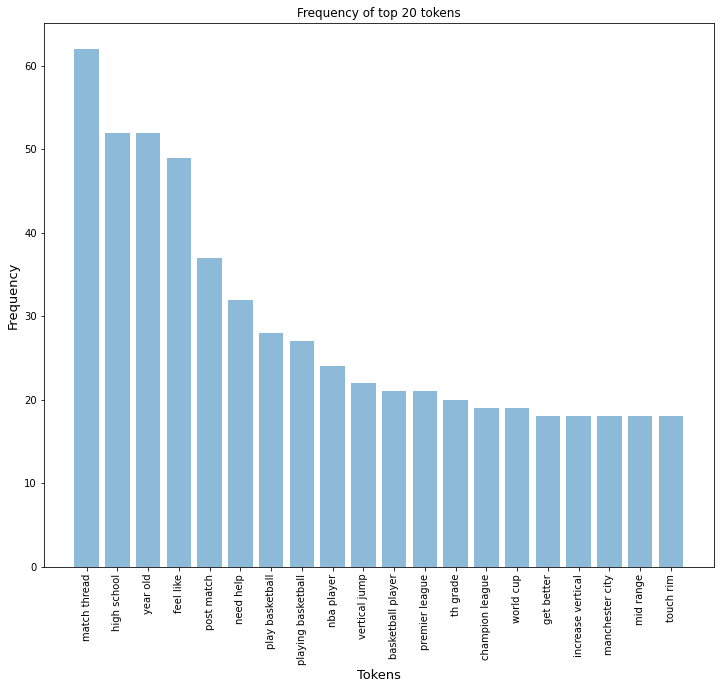

In [555]:
# Plotting a graph of frequency against words
plt.figure(figsize=(12,10))
plt.bar([p[0] for p in freq_of_all_words[:20]],[p[1] for p in freq_of_all_words[:20]],align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylabel('Frequency',fontsize = 13)
plt.xlabel('Tokens',fontsize = 13)
plt.title('Frequency of top 20 tokens');

In [557]:
# Looking at the coefficient of each variable
coef_dict = {}
for coef, feat in zip(lr.coef_.ravel(),cv.get_feature_names()):
    coef_dict[feat] = coef
    
# Sorting and viewing the top features that have the strongest influence on the predictor
sorted_coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse = True)}

# Printing the top 10 features that have the strongest influence on predictions
{K:V for (K,V) in [x for x in sorted_coef_dict.items()][:10]}


{'match thread': -2.275222552814169,
 'west ham': -1.9443724582205173,
 'premier league': -1.9237889032092694,
 'manchester united': -1.7763686582896256,
 'napoli genoa': -1.7363379794908596,
 'liverpool arsenal': -1.721929639229458,
 'atletico madrid': -1.6225662253783724,
 'need help': 1.5944173273850561,
 'manchester city': -1.5257057384600812,
 'high school': 1.473075060159981}

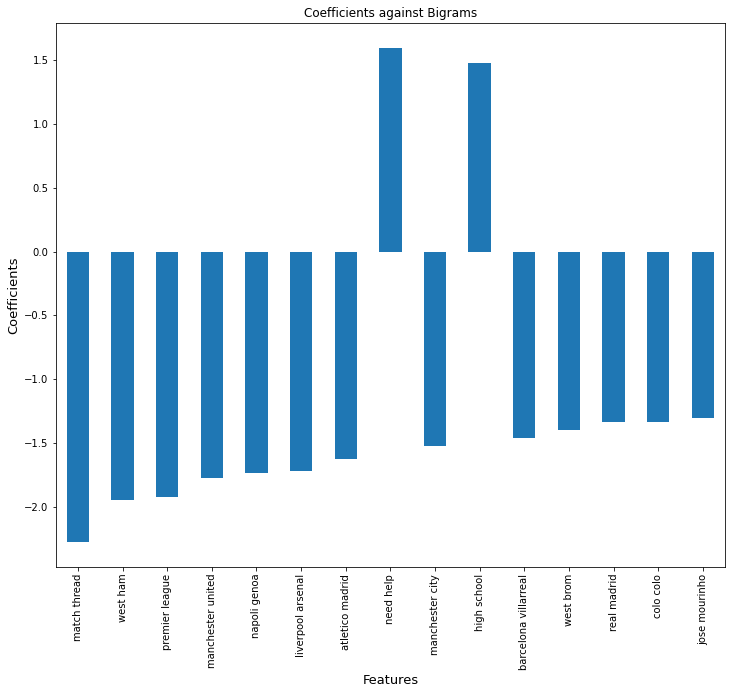

In [560]:
# Graph of coefficients against features for easier visualization and comparison
features = [a for a in sorted_coef_dict.keys()]
coef =  [i for i in sorted_coef_dict.values()]
# Plotting a bar graph for the top 10 features
plt.figure(figsize = (12,10))
pd.Series(coef[:15],index = features[:15]).plot.bar()
plt.title('Coefficients against Bigrams')
plt.ylabel('Coefficients',fontsize = 13)
plt.xlabel('Features',fontsize = 13);

Based on the graph above, the presence of **match thread** bigram seems to have a great influence on the classification power of the model. In addition, majority of the tokens with large coefficients belong to the soccer subreddit which could be due to the imbalanced sizes of classes. 

The use of `TfidVectorizer()` could help to sieve out unique tokens which were diluted by the high frequency of other tokens

### `TfidfVectorizer()` and `LogisticRegression()`

In [46]:
# Pipeline contains a list of steps, steps contain list of tuples
pipe = Pipeline([
    ('tvec',TfidfVectorizer()),
    ('lr',LogisticRegression())
])

In [51]:
pipe_params = {
    
    # Setting a limit of n-number of features included/vocab size
    'tvec__max_features':[1000,1500,2000,2500,3000],
    
    # Setting a minimum number of times the word/token has to appear in n-documents
    'tvec__min_df':[2,3],
    
    # Setting an upper threshold/max percentage of n% of documents from corpus 
    'tvec__max_df':[0.1,0.2,0.3,0.4,0.5],
    
    # Testing with bigrams
    'tvec__ngram_range':[(2,2)]
}
gs = GridSearchCV(pipe,param_grid = pipe_params,cv = 3)
gs.fit(X_train,y_train)
print(f'Mean Accuracy Score: {gs.best_score_}')
print(f'Best hyperparameters: {gs.best_params_}')

Mean Accuracy Score: 0.7988818857570315
Best hyperparameters: {'tvec__max_df': 0.1, 'tvec__max_features': 1000, 'tvec__min_df': 3, 'tvec__ngram_range': (2, 2)}


In [533]:
# Scoring entire X_train dataset using the optimized model
print(f'Accuracy Score for train set: {round(gs.score(X_train,y_train),5)}')

# Scoring X_test dataset using the optimized model
print(f'Accuracy Score for test set {round(gs.score(X_test,y_test),5)}')

Accuracy Score for train set: 0.86492
Accuracy Score for test set 0.83384


In [534]:
tv = TfidfVectorizer(max_df= gs.best_params_['tvec__max_df'],
                     max_features= gs.best_params_['tvec__max_features'],
                     min_df=gs.best_params_['tvec__min_df'],
                     ngram_range=gs.best_params_['tvec__ngram_range'])
tv_fit = tv.fit_transform(X_train)
tv.fit(X_train)
X_train_tv = tv.transform(X_train)
X_test_tv = tv.transform(X_test)

In [535]:
tv = TfidfVectorizer(max_df= gs.best_params_['tvec__max_df'],
                     max_features= gs.best_params_['tvec__max_features'],
                     min_df=gs.best_params_['tvec__min_df'],
                     ngram_range=(2,2))
tv_fit = tv.fit_transform(X_train)
tv.fit(X_train)
X_train_tv = tv.transform(X_train)
X_test_tv = tv.transform(X_test)

In [536]:
# Instantiating model
lr = LogisticRegression()
# Fitting Model
lr.fit(X_train_tv,y_train)
# Calculating the F1 score to measure test's accuracy
preds = lr.predict(X_test_tv)
print(f'F1 score for Logistic Regression model: {round(f1_score(y_test,preds),5)}')

F1 score for Logistic Regression model: 0.8913


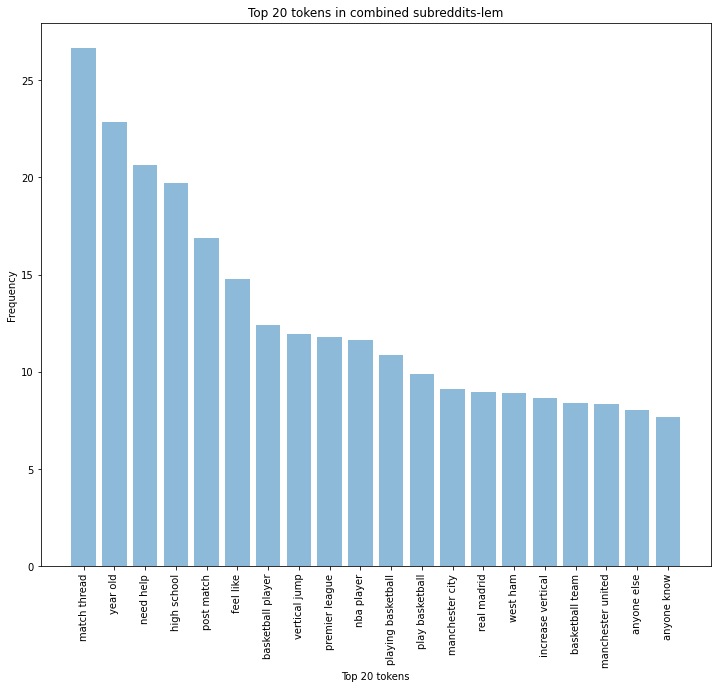

In [537]:
freq_of_all_words = sorted(zip(tv.get_feature_names(),tv_fit.toarray().sum(axis=0)), key = lambda x: x[1], reverse=True)
freq_of_all_words[:10]
# Plotting a graph of freq against words
plt.figure(figsize=(12,10))
plt.bar([p[0] for p in freq_of_all_words[:20]],[p[1] for p in freq_of_all_words[:20]],align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 20 tokens')
plt.title('Top 20 tokens in combined subreddits-lem');

In [539]:
# Looking at the coefficient of each variable
coef_dict = {}
for coef, feat in zip(lr.coef_.ravel(),tv.get_feature_names()):
    coef_dict[feat] = coef
    
# Sorting and viewing the top features that have the strongest influence on the predictor
sorted_coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse = True)}

# Printing the top 10 features that have the strongest influence on predictions
{K:V for (K,V) in [x for x in sorted_coef_dict.items()][:10]}

{'match thread': -3.1549092268437122,
 'premier league': -2.189362310091163,
 'west ham': -2.0608572709044863,
 'manchester united': -2.006247160595293,
 'manchester city': -1.9074701350844891,
 'post match': -1.891158531504413,
 'napoli genoa': -1.7864006263504442,
 'real madrid': -1.780603023352161,
 'high school': 1.769120742266639,
 'liverpool arsenal': -1.7488217662805263}

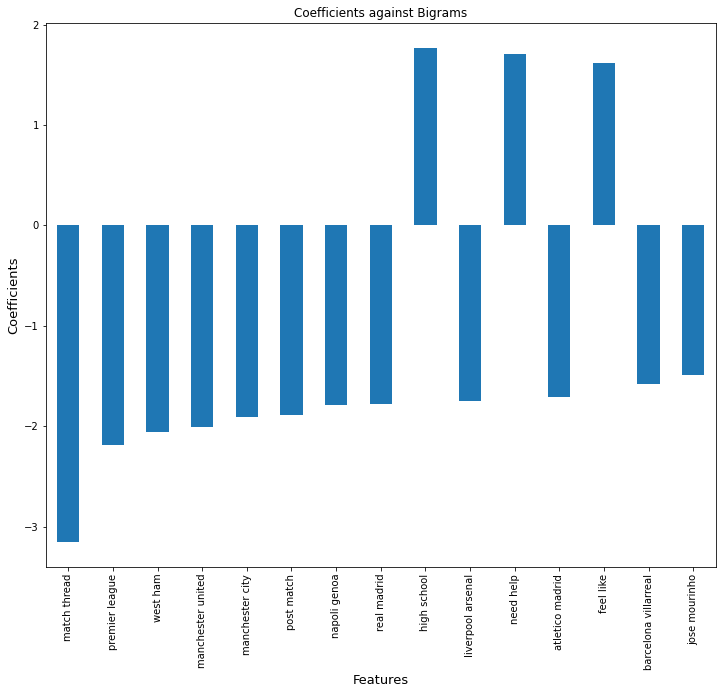

In [545]:
# Graph of coefficients against features for easier visualization and comparison
features = [a for a in sorted_coef_dict.keys()]
coef =  [i for i in sorted_coef_dict.values()]
# Plotting a bar graph for the top 10 features
plt.figure(figsize = (12,10))
pd.Series(coef[:15],index = features[:15]).plot.bar()
plt.title('Coefficients against Bigrams')
plt.ylabel('Coefficients',fontsize =13)
plt.xlabel('Features',fontsize =13);

Similar to the model with `CountVectorizer()`, the **match thread** bigram has the greatest influence on the logistic regression model given its large coefficients. In addition, most of the bigrams that have a strong influence on the classification power of the model comes from the soccer dataset.

### Naive Bayes Model

The presence of labelled data also allows for the implementation of another classification technique conned the Nayes Bayes Model which assumes that the occurrence of events are independent of one another. Thus it computes the probability that an unseen document belongs to the basketball subreddit given its comprised words. Since the columns of X are integers, a `MultiNomialNB()` would be used. This model is usually implemented for its simplicity, speed and ease of use. 

In [52]:
pipe = Pipeline([
    ('tvec',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

In [53]:
pipe_params = {
    
    # Setting a limit of n-number of features included/vocab size
    'tvec__max_features':[1000,1500,2000,2500,3000],
    
    # Setting a minimum number of times the word/token has to appear in n-documents
    'tvec__min_df':[2,3],
    
    # Setting an upper threshold/max percentage of n% of documents from corpus 
    'tvec__max_df':[0.1,0.2,0.3,0.4,0.5],
    
    # Testing with bigrams
    'tvec__ngram_range':[(2,2)]
}
gs = GridSearchCV(pipe,param_grid = pipe_params,cv = 3)
gs.fit(X_train,y_train)
print(f'Mean Accuracy Score for Naive Bayes: {gs.best_score_}')
print(f'Best hyperparameters for Naive Bayes: {gs.best_params_}')

Mean Accuracy Score for Naive Bayes: 0.8351767973393178
Best hyperparameters for Naive Bayes: {'tvec__max_df': 0.1, 'tvec__max_features': 1500, 'tvec__min_df': 2, 'tvec__ngram_range': (2, 2)}


In [563]:
# Accuracy scores for entire train data
print(f'The accuracy score of train set: {round(gs.score(X_train,y_train),5)}')
# Accuracy scores for the test data
print(f'The accuracy score of test set: {round(gs.score(X_test,y_test),5)}')

The accuracy score of train set: 0.8997
The accuracy score of test set: 0.8565


In [564]:
tv = TfidfVectorizer(max_df= gs.best_params_['tvec__max_df'],
                     max_features= gs.best_params_['tvec__max_features'],
                     min_df=gs.best_params_['tvec__min_df'],
                     ngram_range=gs.best_params_['tvec__ngram_range'])
X_train_tv = tv.fit_transform(X_train)
X_test_tv = tv.transform(X_test)

In [565]:
tv = TfidfVectorizer(max_df= gs.best_params_['tvec__max_df'],
                     max_features= gs.best_params_['tvec__max_features'],
                     min_df=gs.best_params_['tvec__min_df'],
                     ngram_range=gs.best_params_['tvec__ngram_range'])
X_train_tv = tv.fit_transform(X_train)
X_test_tv = tv.transform(X_test)

In [566]:
nb = MultinomialNB()
nb.fit(X_train_tv,y_train)
preds = nb.predict(X_test_tv)
print(f'F1 score for Naive Bayes model: {round(f1_score(y_test,preds),5)}')

F1 score for Naive Bayes model: 0.90414


## Conclusions and Recommendations

**Benefits of determining important tokens:** <br>
Based on the analysis of data collected from each subreddit, the use of `TfitVectorizer()` has given us insight on the current sentiments of the respective reddit users. The exploration of bigrams has uncover trends within each specific subgroup, namely seeking assistance with regards to the technical aspects of basketball as well as the prevalence of the **high school** bigram which could indicate a sparked interest in that particular group of consumers. Whereas within the soccer community, the high occurrence of of **post thread** and **match thread** suggest that users are more engaged in post match discussions and their interests lie in specific soccer teams. Such differing behaviours could provide an avenue for business ideas that cater specifically to a group of target consumers. Leveraging on a demand for assistance in basketball programs/clinics, sports academies could invest in advertizing their services on these platforms. Moreover, they could also extend their outreach through collaborations with schools as a more directed avenue. <br>
Whereas for the soccer community, companies could invest in developing platforms where services such as provision of real time updates on games and soccer teams to cater to the large fanbase. Therefore, this model could provide actionable insights even for companies that are not in touch with the sports industry.

**Highly accurate predictive performance of model:**


Summary of the accuracy scores from different models with their corresponding vectorizers and tuned parameters

| Model | Normalization technique | Vectorizer | Best Parameters | Train Set Accuracy | Test Set Accuracy | F1 Score |
| --- | --- | --- | --- | --- | --- | --- |
|Logistic Regression|Lemmatization|CountVectorizer|max_df: 0.1, max_features: 1500, min_df: 2, ngram_range:(2,2)|0.81047|0.88407|0.88955|
|Logistic Regression|Lemmatization|TF-IDF|max_df: 0.1, max_features: 1000, min_df: 2, ngram_range: (2, 2)|0.86492|0.83384|0.89130|   
|Naive Bayes|Lemmatization|TF-IDF|max_df: 0.1, max_features: 1500, min_df: 2, ngram_range: (2, 2)|0.8997|0.8565|0.90414|


Based on the table above, the Logistic regression model with a TF-IDF vectorizer would be the model of choice given a small margin of difference between the accuracy scores of train and test set. This is indicative of a model with low variance and a low chance of overfitting thus the model is able to generalize better to unseen data. In addition, the choice of the logistic regression over the naive bayes is due to the quantifiable influence of tokens on the output of the model. The larger the coefficients, the greater the importance of token on the output. Lastly, our model performs better than our baseline accuracy and thus would be worthwhile to implement

**Difficulties in establishing independence between tokens**: <br>
Since the titles and content of posts are usually correlated, models such as Linear Regression and Naive Bayes which require features to be independent would not fare well in modelling text classification problems. Since establishing independence is an assumption for both logistic regression and naive bayes, multicollinearity between features would greatly affect the performance of our model.  In addition, discussion platforms are prone to repetitive and similar content given that the body of a post is an extension of its title, and thus would further reduce the model's performance in predicting categories of future posts. The possibility of **data leakage** is also high when rows in the data are similar even if train test split was done. 

**Problems with small datasets** <br>
The use of bigrams in our dataset significantly reduces the size of our input data and therefore our logistic regression model is very sensitive to outliers. Therefore, more data should be collected before they are fed as inputs into our model. Another way to deal with the small dataset would be to utilize the Naive Bayes model which copes well with a smaller dataset and with outliers. 

## Referrences

- Ahmed, M. (2019, December 06). Home. Retrieved October 02, 2020, from http://in.kompass.com/e/en/article-b2b/10-profitable-business-ideas-for-sports-lovers/
- Ajaero Tony MartinsFounder / Publisher at Profitable Venture Magazine LtdAjaero Tony Martins is an Entrepreneur. (2020, June 13). 50 Best Sports Business ideas &amp; Opportunities for 2020. Retrieved October 02, 2020, from https://www.profitableventure.com/sports-business-ideas/